# Assignment 5

### Name: Mahaprasad Mohanty
### Roll No: 24MDT0061

# Question 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
nut_df = pd.read_excel('NutAverage.xlsx')
nut_df.head()

,Day Count,NH4-N,NO2-N,NO3-N,TN
0,1,6.915879,2.885372,7.457832,35.834969
1,47,6.344965,2.852123,5.696753,36.359106
2,78,4.964745,2.090747,2.167375,40.719987
3,116,4.361492,2.301630,1.653266,24.931194
4,143,3.980372,1.419541,0.233538,36.234797


In [5]:
# Finding null values
nut_df.isnull().sum()

Day Count    0
NH4-N        0
NO2-N        0
NO3-N        0
TN           0
dtype: int64

In [6]:
# Adding a column DIN and DON
nut_df['DIN'] = nut_df['NH4-N'] + nut_df['NO2-N'] + nut_df['NO3-N']
nut_df['DON'] = nut_df['TN'] - nut_df['DIN']

In [7]:
# Adding a row named averages
avg_row = nut_df.mean()
nut_df.loc['Average'] = avg_row

In [8]:
# describing characterisitcs
nut_df.describe()

,Day Count,NH4-N,NO2-N,NO3-N,TN,DIN,DON
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,189.666667,4.536201,2.150382,2.038842,34.513920,8.725425,25.788496
std,110.867288,1.373646,0.453143,2.144153,5.956099,3.596171,6.530319
min,1.000000,1.956891,1.416273,0.185584,24.931194,4.474016,16.614806
25%,116.000000,3.980372,1.977844,0.831846,30.017141,6.415864,21.465266
50%,189.666667,4.521629,2.250251,1.613106,35.834969,8.316388,25.543126
75%,270.000000,4.964745,2.305632,2.038842,36.359106,9.059374,30.601346
max,364.000000,6.915879,2.885372,7.457832,45.557639,17.259083,38.657873


<Axes: >

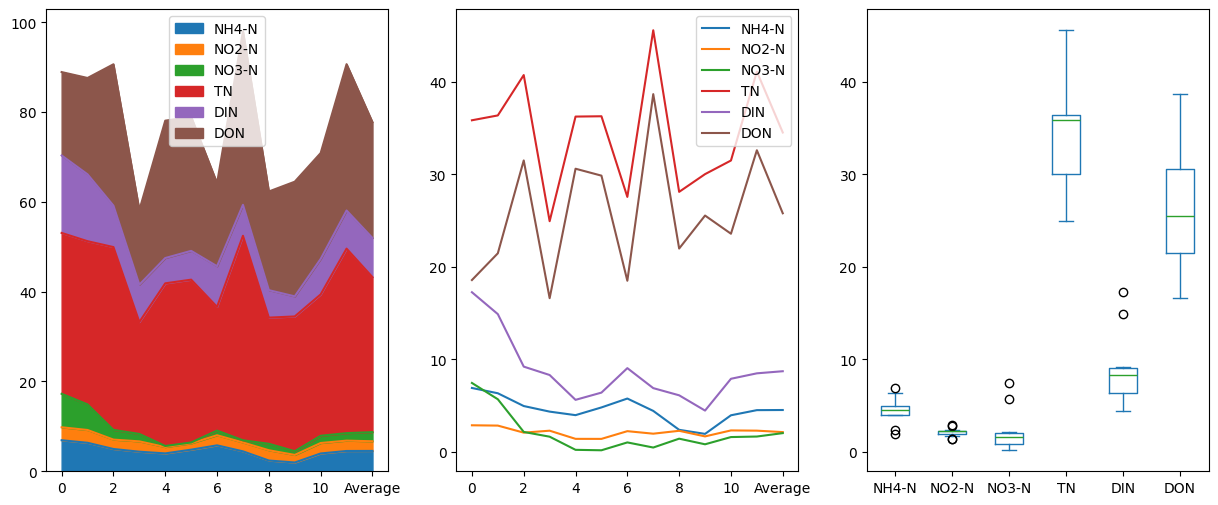

In [10]:
# plotting all using areaplot, lineplot, boxplot
fig, ax = plt.subplots(1,3, figsize=(15,6))
temp_df = nut_df.drop(columns=['Day Count'])
temp_df.plot(kind = 'area', ax = ax[0])
temp_df.plot(kind = 'line', ax = ax[1])
temp_df.plot(kind = 'box', ax = ax[2])

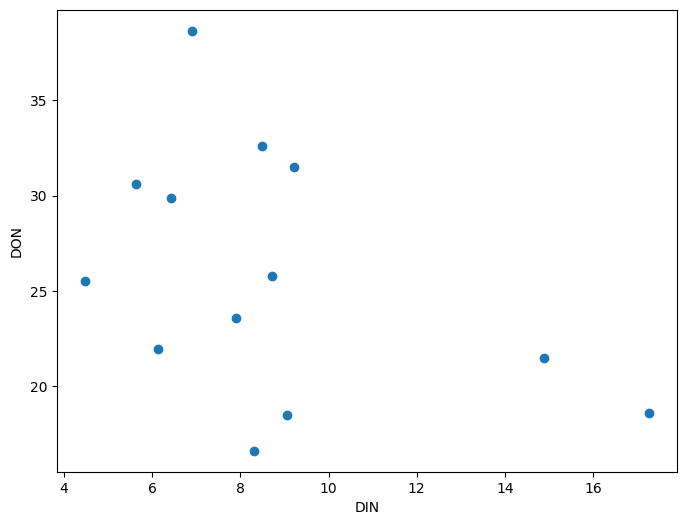

In [11]:
# Creating scatterplot of DIN vs DON
plt.figure(figsize=(8,6))
plt.scatter(temp_df['DIN'], temp_df['DON'])
plt.xlabel('DIN')
plt.ylabel('DON')
plt.show()

# Question 2

In [12]:
ph_df = pd.read_excel('PythoBiomass.xlsx')
ph_df.head()

,Days,Cyanophyceans,Chlorophyceae,Total Biomass
0,1,0.554035,0.340955,4.775824
1,47,0.409126,0.446749,4.536462
2,78,0.606581,0.210896,4.131376
3,116,0.308334,1.301525,3.597625
4,143,0.828900,0.352965,2.867716


In [13]:
# finding null values
ph_df.isna().sum()

Days              0
Cyanophyceans     0
Chlorophyceae     0
Total Biomass     0
dtype: int64

In [15]:
# Adding others column
ph_df['Others'] = ph_df['Total Biomass '] - (ph_df['Cyanophyceans'] + ph_df['Chlorophyceae'])

In [16]:
# describing characteristics of dataframe
ph_df.describe()

,Days,Cyanophyceans,Chlorophyceae,Total Biomass,Others
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,189.666667,4.096431,0.707822,8.597235,3.792982
std,115.797106,9.944160,0.443034,10.307117,2.191045
min,1.000000,0.308334,0.210896,2.867716,1.029841
25%,106.500000,0.570355,0.350853,3.536107,2.278817
50%,195.500000,0.825581,0.492309,4.656143,3.552089
75%,277.000000,1.782892,1.201670,9.084406,4.159469
max,364.000000,35.462698,1.327444,40.195265,8.985380


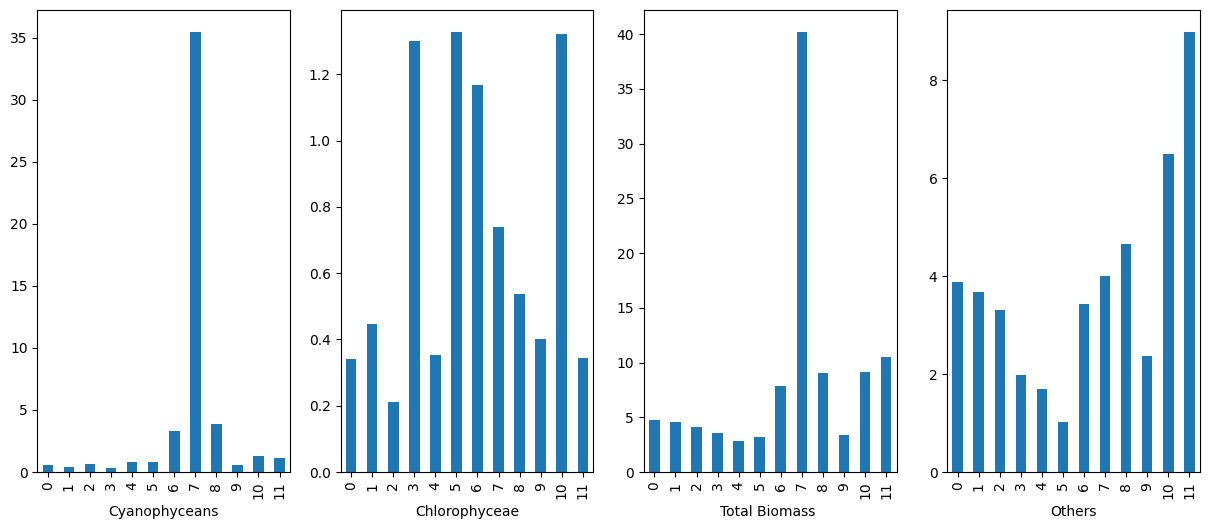

In [22]:
# plot biomass composition of each group using a bar and box plot
fig,ax = plt.subplots(1,4, figsize=(15, 6))
temp_ph_df = ph_df.drop(columns=['Days'])
cols = temp_ph_df.columns
for i, col in enumerate(cols):
    temp_ph_df[col].plot(kind = 'bar', ax = ax[i], label=col)
    ax[i].set_xlabel(f'{col}')

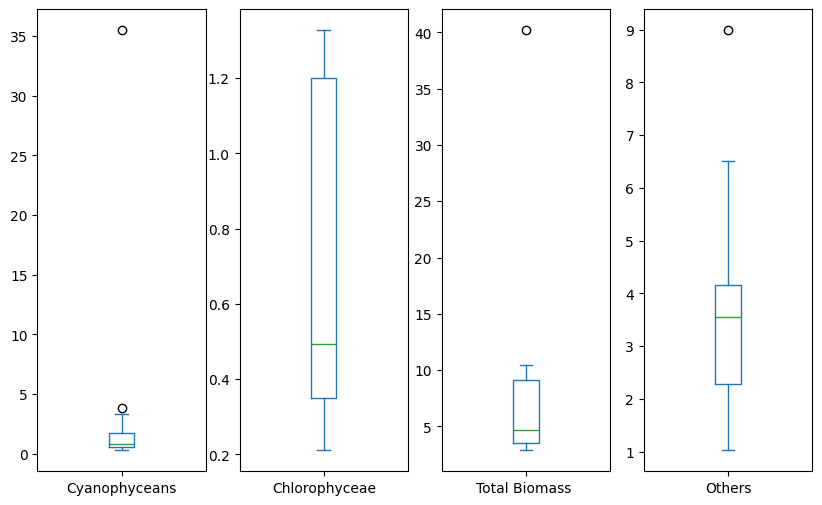

In [20]:
fig,ax = plt.subplots(1,4, figsize=(10, 6))
cols = temp_ph_df.columns
for i, col in enumerate(cols):
    temp_ph_df[col].plot(kind = 'box', ax = ax[i], label=col)

# Question 3

In [23]:
do_df = pd.read_csv('DOData.csv')

<Axes: >

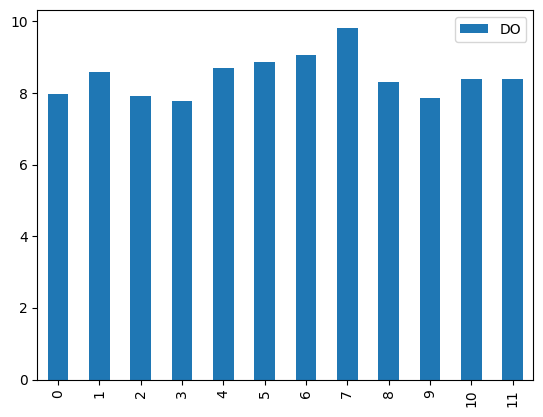

In [24]:
do_df.drop(columns=['Days']).plot(kind = 'bar')

In [32]:
# renaming nut_df to match with do_df
nut_df = nut_df.rename(columns={'Day Count': 'Days'})

Text(0.5, 1.0, 'NH4-N Concentration Over Time')

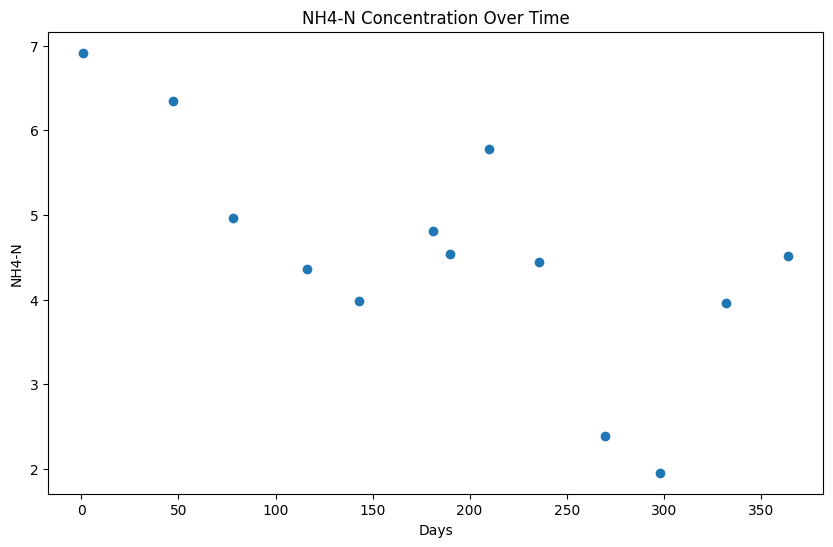

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(nut_df['Days'], nut_df['NH4-N'])
plt.xlabel('Days')
plt.ylabel('NH4-N')
plt.title('NH4-N Concentration Over Time')

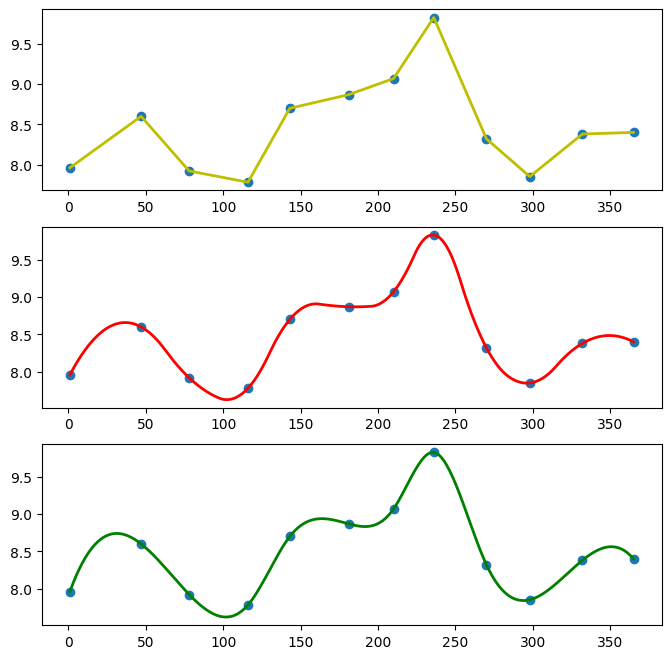

In [43]:
from scipy.interpolate import interp1d
import numpy as np
x = do_df['Days']
y = do_df['DO']

fig, ax = plt.subplots(3,1, figsize=(8,8))

# Linear interpolation
lp1 = interp1d(x,y,kind='linear')
xs = np.linspace(1,365,365)
ax[0].plot(x,y,'o')
ax[0].plot(xs, lp1(xs), '-y', lw=2, label='Linear Interpolation')

# quadratic interpolation 
lp2 = interp1d(x,y,kind='quadratic')
xs = np.linspace(1,365,365)
ax[1].plot(x,y,'o')
ax[1].plot(xs, lp2(xs), '-r', lw=2, label='Quadratic Interpolation')

# cubic interpolation
lp3 = interp1d(x,y,kind='cubic')
xs = np.linspace(1,365,365)
ax[2].plot(x,y,'o')
ax[2].plot(xs, lp3(xs), '-g', lw=2, label='Cubic Interpolation')